# Example 1: Bootstrap CI for the MEAN of an exponential distribution

In [1]:
import numpy as np

def bootstrap_ci(data, stat_func, n_boot=2000, alpha=0.05):
    """
    Compute a non-parametric bootstrap CI for a statistic.
    data      : 1D array of observations
    stat_func : function to compute the statistic (e.g., np.mean)
    n_boot    : number of bootstrap replicates
    alpha     : significance level for (1-alpha) CI
    """
    boots = []
    n = len(data)
    for _ in range(n_boot):
        sample = np.random.choice(data, size=n, replace=True)  # resample with replacement
        boots.append(stat_func(sample))
    lower = np.percentile(boots, 100 * alpha/2)
    upper = np.percentile(boots, 100 * (1 - alpha/2))
    return lower, upper

[ 2.34634045 15.05060715  6.58372847  4.56471277  0.84812435  0.84798146
  0.29919384 10.05615432  4.59541077  6.15625031  0.10399654 17.51778738
  8.93214772  1.19343813  1.00339494  1.01305711  1.81376865  3.71963915
  2.82768533  1.72111496  4.73185437  0.75117264  1.72757756  2.28138609
  3.04467344  7.68968006  1.11367931  3.61014578  4.48752361  0.23781925
  4.6766651   0.93480626  0.33631965 14.86843897 16.85315171  8.26165786
  1.8164393   0.51388658  5.76375382  2.90045421  0.65076117  3.41773614
  0.17496861 12.00211444  1.49728888  5.43127899  1.86773291  3.67055448
  3.95611899  1.021943   17.46403566  7.46122689 14.0254721  11.26075999
  4.55527206 12.7471769   0.46327729  1.09067347  0.23140983  1.96766043
  2.46065146  1.58280222  8.82278933  2.206135    1.6490142   3.91203542
  0.75949074  8.10241798  0.38737934 21.6707317   7.39741888  1.1076972
  0.0276871   8.44948389  6.13547954  6.52831454  7.37607263  0.38464633
  2.21946336  0.61575052  9.94264786  4.88150596  2.

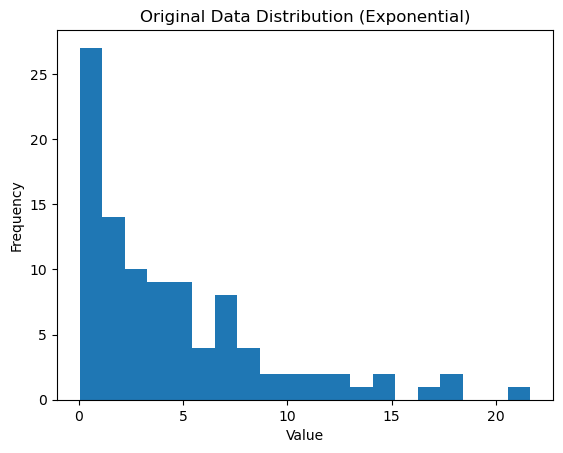

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------------------------
# 1. Simulate a skewed dataset (Exponential)
# -----------------------------------------------
np.random.seed(42)  
data = np.random.exponential(scale=5, size=100)

# Plot original data distribution
plt.figure()
plt.hist(data, bins=20)
plt.title("Original Data Distribution (Exponential)")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()




In [3]:
np.mean(data)

np.float64(4.5737401951943575)

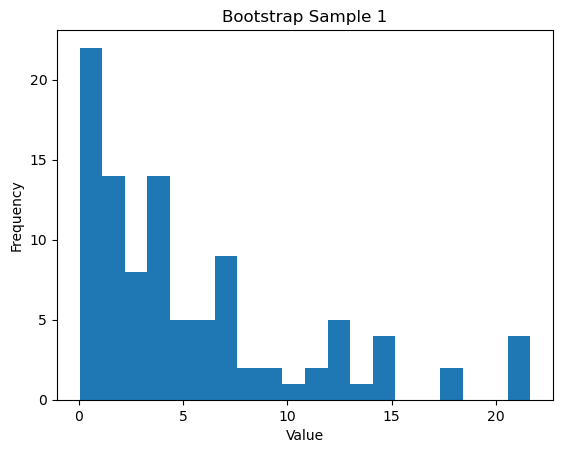

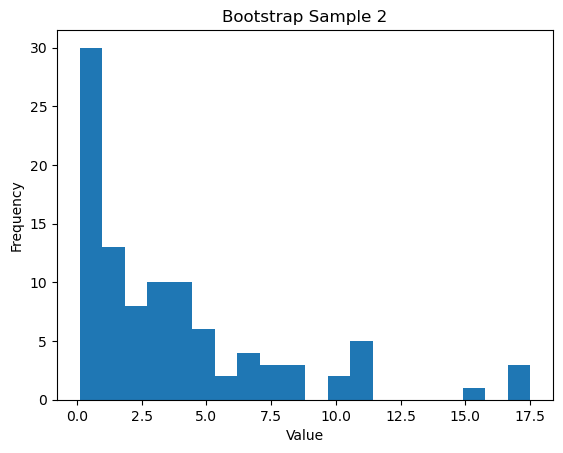

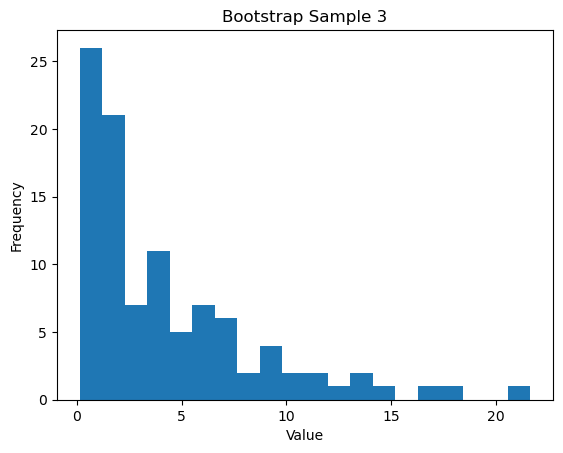

In [4]:
# ---------------------------------------------------
# 2. Generate and plot several bootstrap samples
# ---------------------------------------------------
n_boot_samples = 3
sample_size = len(data)

for i in range(1, n_boot_samples + 1):
    # Resample with replacement
    sample = np.random.choice(data, size=sample_size, replace=True)
    plt.figure()
    plt.hist(sample, bins=20)
    plt.title(f"Bootstrap Sample {i}")
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.show()


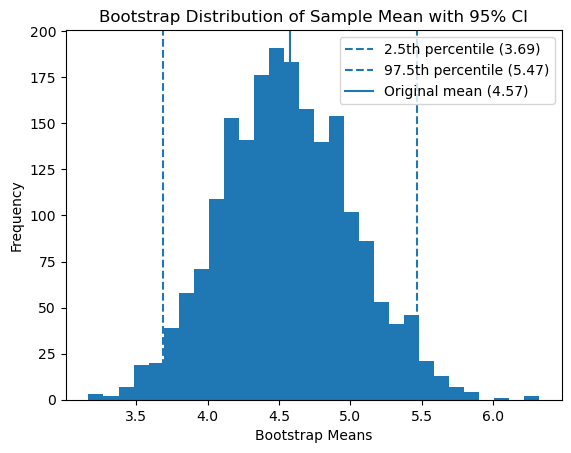

In [5]:

# ---------------------------------------------------
# 3. Build full bootstrap distribution of the mean
# ---------------------------------------------------
n_replicates = 2000
boots = []
for _ in range(n_replicates):
    # Resample and compute the statistic (mean)
    sample = np.random.choice(data, size=sample_size, replace=True)
    boots.append(np.mean(sample))

# Compute 95% CI bounds
lower = np.percentile(boots, 2.5)
upper = np.percentile(boots, 97.5)
obs_mean = np.mean(data)

# Plot the bootstrap distribution of means with CI
plt.figure()
plt.hist(boots, bins=30)
plt.axvline(lower, linestyle='--', label=f"2.5th percentile ({lower:.2f})")
plt.axvline(upper, linestyle='--', label=f"97.5th percentile ({upper:.2f})")
plt.axvline(obs_mean, linestyle='-', label=f"Original mean ({obs_mean:.2f})")
plt.title("Bootstrap Distribution of Sample Mean with 95% CI")
plt.xlabel("Bootstrap Means")
plt.ylabel("Frequency")
plt.legend()
plt.show()

# Example 2: Bootstrap CI for the MEDIAN of a skewed (Exponential) distribution

In [6]:
np.random.seed(1)
# Simulate 100 observations from an Exponential distribution (scale=5)
data2 = np.random.exponential(scale=5, size=100)

median2 = np.median(data2)
ci2 = bootstrap_ci(data2, np.median)
print(f"Example 2 - Sample median: {median2:.2f}")
print(f"Example 2 - 95% bootstrap CI for median: ({ci2[0]:.2f}, {ci2[1]:.2f})\n")

Example 2 - Sample median: 3.19
Example 2 - 95% bootstrap CI for median: (2.65, 4.42)



# Example 3: Bootstrap CI for a PROPORTION (Bernoulli data)

In [7]:

np.random.seed(2)
# Simulate 100 binary outcomes with p=0.3
data3 = np.random.binomial(n=1, p=0.3, size=100)

prop3 = np.mean(data3)
ci3 = bootstrap_ci(data3, np.mean)
print(f"Example 3 - Sample proportion: {prop3:.2f}")
print(f"Example 3 - 95% bootstrap CI for proportion: ({ci3[0]:.2f}, {ci3[1]:.2f})\n")

Example 3 - Sample proportion: 0.21
Example 3 - 95% bootstrap CI for proportion: (0.14, 0.29)



# Example 4: Bootstrap CI for the DIFFERENCE IN MEANS between two independent groups


In [8]:
np.random.seed(3)
# Group A: n=50, mean=5, sd=2; Group B: n=60, mean=7, sd=2.5
groupA = np.random.normal(loc=5, scale=2, size=50)
groupB = np.random.normal(loc=7, scale=2.5, size=60)

obs_diff = np.mean(groupA) - np.mean(groupB)

# Perform bootstrap: resample each group separately each replicate
boots_diff = []
for _ in range(2000):
    sampA = np.random.choice(groupA, size=len(groupA), replace=True)
    sampB = np.random.choice(groupB, size=len(groupB), replace=True)
    boots_diff.append(np.mean(sampA) - np.mean(sampB))

ci4_lower = np.percentile(boots_diff, 2.5)
ci4_upper = np.percentile(boots_diff, 97.5)
print(f"Example 4 - Observed mean difference (A - B): {obs_diff:.2f}")
print(f"Example 4 - 95% bootstrap CI for difference: ({ci4_lower:.2f}, {ci4_upper:.2f})\n")

Example 4 - Observed mean difference (A - B): -2.80
Example 4 - 95% bootstrap CI for difference: (-3.63, -1.97)



## On your own:

Below are five simulated data sets. In each one, you are asked to bootstrap a particular metric. Please generate 95% confidence intervals (two sided distribution) for each metric and interpret what the confidence interval tells you. 

In [ ]:
import numpy as np

# Set a common sample size
n = 100

In [ ]:
# 1. 100 draws from a Normal(μ=50, σ=10) distribution.
#    → Bootstrap the **sample mean**.
np.random.seed(0)
data1 = np.random.normal(loc=50, scale=10, size=n)

ci1 = bootstrap_ci(data1, np.mean)
print(ci1)

# mean of this normal distrib is between 48 and 52 with around 95% certainty 

(np.float64(48.61538196657451), np.float64(52.6205526771515))


In [ ]:
# 2. 100 draws from an Exponential(scale=5) (skewed) distribution.
#    → Bootstrap the **sample median**.
np.random.seed(1)
data2 = np.random.exponential(scale=5, size=n)

ci2 = bootstrap_ci(data2, np.median)
print(ci2)

# median of this exponential distrib is between 2.6 and 4.4 with around 95% certainty

(np.float64(2.6475269821794045), np.float64(4.416154411050316))


In [ ]:
# 3. 100 draws from a Uniform(0, 100) distribution.
#    → Bootstrap the **90th percentile**.
np.random.seed(2)
data3 = np.random.uniform(low=0, high=100, size=n)

def percentile_90(sample):
    return np.percentile(sample, 90)

ci3 = bootstrap_ci(data3, percentile_90)
print(ci3)

# 90th percentile of this distrib is between 76 and 95 with around 95% certainty

(np.float64(76.61197929062234), np.float64(95.37422269448666))


In [ ]:
# 4. 100 Bernoulli trials with p=0.3 (0/1 data).
#    → Bootstrap the **sample proportion** (mean of the 0/1’s).
np.random.seed(3)
data4 = np.random.binomial(n=1, p=0.3, size=n)

ci4 = bootstrap_ci(data4, np.mean)
print(ci4)

# sample proportion is between 0.13 and 0.3 with around 95% certainty 

(np.float64(0.13), np.float64(0.3))


In [31]:
# 5. 100 draws from a heavy-tailed Student’s t (df=3).
#    → Bootstrap the **sample standard deviation**.
np.random.seed(4)
data5 = np.random.standard_t(df=3, size=n)

ci5 = bootstrap_ci(data5, np.std)
print(ci5)
# sample std is between 1.1 and 1.8 with around 95% certainty 

(np.float64(1.1627971321297488), np.float64(1.8271014826327523))


<details>
<summary><strong>Instructor Solution</strong></summary>

```python
import numpy as np

# Bootstrap function
def bootstrap_ci(data, stat_func, n_boot=2000, alpha=0.05):
    boots = []
    n = len(data)
    for _ in range(n_boot):
        sample = np.random.choice(data, size=n, replace=True)
        boots.append(stat_func(sample))
    lower = np.percentile(boots, 100 * alpha/2)
    upper = np.percentile(boots, 100 * (1 - alpha/2))
    return np.mean(data) if stat_func == np.mean else stat_func(data), lower, upper

# Simulations
n = 100
np.random.seed(0)
data1 = np.random.normal(loc=50, scale=10, size=n)
np.random.seed(1)
data2 = np.random.exponential(scale=5, size=n)
np.random.seed(2)
data3 = np.random.uniform(low=0, high=100, size=n)
np.random.seed(3)
data4 = np.random.binomial(n=1, p=0.3, size=n)
np.random.seed(4)
data5 = np.random.standard_t(df=3, size=n)

# Define statistics
stats = [
    ("normal", np.mean),
    ("exponential", np.median),
    ("uniform", lambda x: np.percentile(x, 90)),
    ("binomial", np.mean),
    ("t_df3", np.std),
]

datasets = {
    "normal": data1,
    "exponential": data2,
    "uniform": data3,
    "binomial": data4,
    "t_df3": data5,
}

# Compute bootstrap CIs
results = []
for name, func in stats:
    data = datasets[name]
    obs = func(data)
    _, lower, upper = bootstrap_ci(data, func)
    results.append({
        "dataset": name,
        "statistic": func.__name__ if hasattr(func, '__name__') else "percentile_90",
        "observed": obs,
        "ci_lower": lower,
        "ci_upper": upper
    })

results


## Finally: find a new data set out in the real world, load it in, generate a histrogram, calculate the sample mean, and generate a 95% (two sided) boostrap confidence interval. Once you finish you can continue the MLE lab from July 17th or move on to your project work once you've finished. 

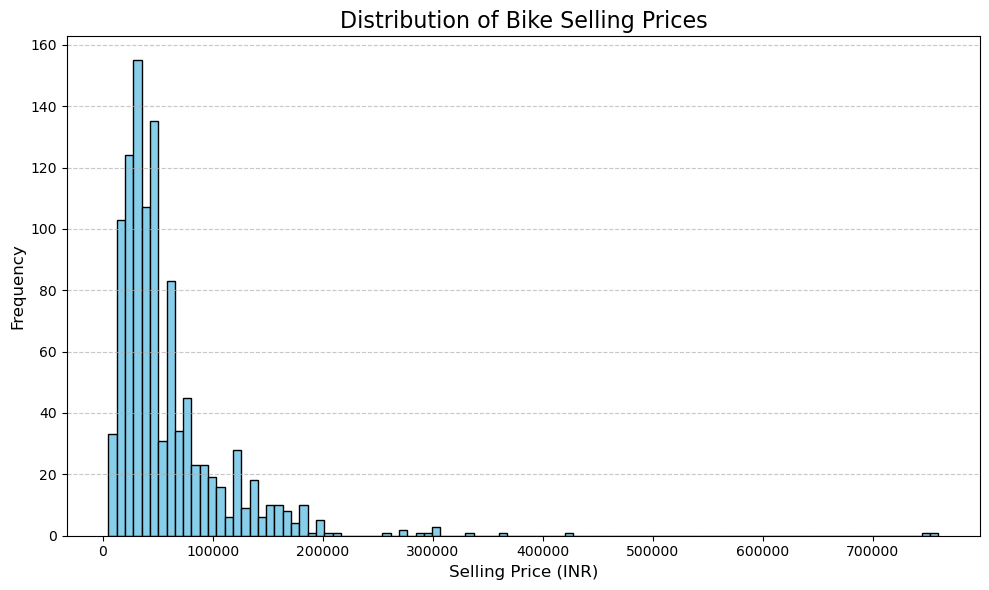

Sample mean: 59638.151743638075
Confidence interval: 56265.2421065033, 63124.995876531575


In [47]:
import pandas as pd
df = pd.read_csv('bike_prices.csv')

prices = df['Selling_Price']

plt.figure(figsize=(10, 6))
plt.hist(prices, bins=100, color='skyblue', edgecolor='black')
plt.title("Distribution of Bike Selling Prices", fontsize=16)
plt.xlabel("Selling Price (INR)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print("Sample mean:", np.mean(prices))
ci_prices = bootstrap_ci(prices, np.mean)
print(f"Confidence interval: {float(ci_prices[0])}, {float(ci_prices[-1])}")